In [1]:
# iniatialize the directories and global variables
import os

SRC_DIR = os.getcwd()

# get the parent directory
PARENT_DIR = os.path.dirname(SRC_DIR)

# images directory
IMG_DIR = os.path.join(PARENT_DIR, 'images')
IP_IMG_DIR = os.path.join(IMG_DIR, 'input')
OP_IMG_DIR = os.path.join(IMG_DIR, 'output')

In [2]:
# import the required libraries for the project
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

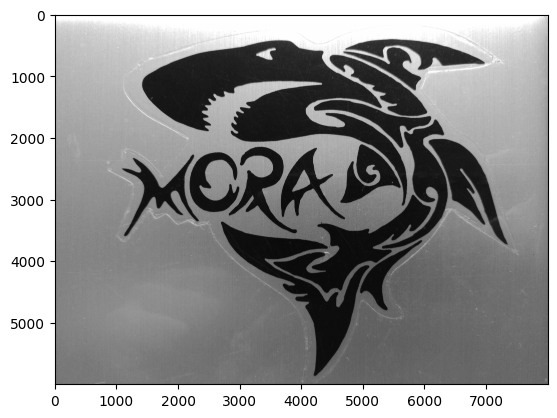

In [3]:
orgimg = cv.imread(IP_IMG_DIR + '/mora.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(orgimg, cmap='gray')

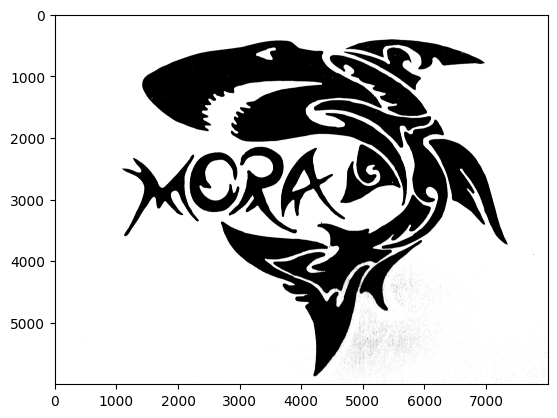

In [4]:
# decide the best threshold value

# otsu thresholding
ret, otsuimg = cv.threshold(orgimg, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(otsuimg, cmap='gray')

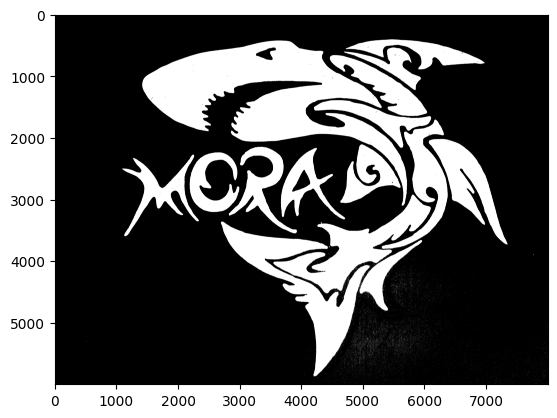

In [5]:
# binary inverse thresholding
ret, bininvimg = cv.threshold(otsuimg, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(bininvimg, cmap='gray')

True

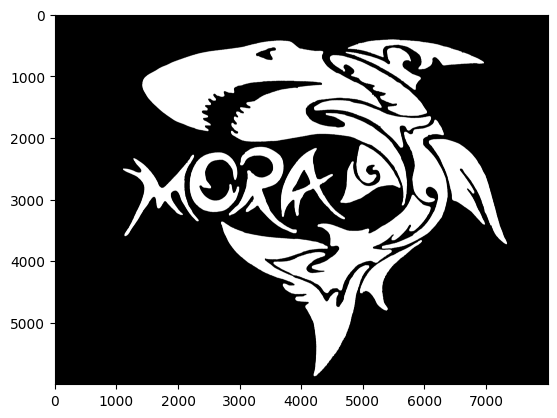

In [6]:
# Morphological transformation:  closing: Dilation followed by Erosion
ksize = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT,(ksize,ksize))
opening  = cv.morphologyEx(bininvimg, cv.MORPH_OPEN, kernel, iterations=4) # remove white noise in background
closing= cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations=4) # remove black noise in foreground
plt.imshow(closing, cmap='gray')

# save high resolution images
cv.imwrite(OP_IMG_DIR + '/mora_final.jpg', closing)

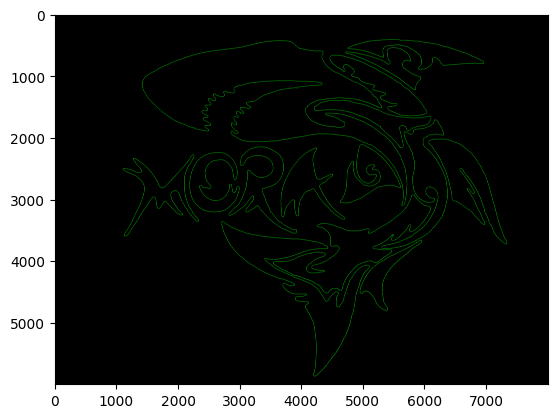

True

In [7]:
# cv.RETR_EXTERNAL retrieve only the extreme outer contours
contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours (-1 argument to plot all the contours)
im_contours = np.zeros((closing.shape[0],closing.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours, contours, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts), plt.show()

# save high resolution image
cv.imwrite(OP_IMG_DIR + '/contours_external.jpg', conts)

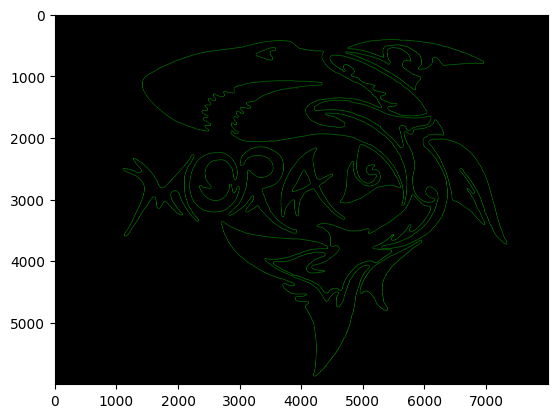

True

In [8]:
# cv.RETR_CCOMP retrieves all of the contours and organizes them into a two-level hierarchy.
contours, _ = cv.findContours(closing, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours (-1 argument to plot all the contours)
im_contours = np.zeros((closing.shape[0],closing.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours, contours, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts), plt.show()

# save high resolution image
cv.imwrite(OP_IMG_DIR + '/contours_ccomp.jpg', conts)